In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import torch
from transformers import (
    RobertaTokenizerFast,
    RobertaForSequenceClassification,
    TrainingArguments,
    Trainer,
    AutoConfig
)
from sklearn.metrics import accuracy_score


In [5]:
from transformers import pipeline

# Load the tokenizer and model
tokenizer = RobertaTokenizerFast.from_pretrained("/content/drive/MyDrive/Marcus_Project/roberta_academic_finetuned/model")
model = RobertaForSequenceClassification.from_pretrained("/content/drive/MyDrive/Marcus_Project/roberta_academic_finetuned/model")
classifier = pipeline('text-classification',"/content/drive/MyDrive/Marcus_Project/roberta_academic_finetuned/model")


##Testing wiki Dataset

##Chatgpt dataset


In [18]:
import json

# Replace 'your_file.jsonl' with the path to your JSONL file
file_path = '/content/drive/MyDrive/Marcus_Project/wiki/wikipedia_chatgpt_test.jsonl'

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse each line as a JSON object
        json_obj = json.loads(line.strip())

        # Print the keys of the JSON object
        print(json_obj.keys())
        break

# Open the JSONL file
with open(file_path, 'r') as file:
    # Initialize a counter
    line_count = 0
    # Iterate over each line in the file
    for line in file:
        # Increment the counter for each line
        line_count += 1

# Print the total number of lines
print("Total number of lines:", line_count)


dict_keys(['prompt', 'human_text', 'machine_text', 'model', 'source', 'source_id'])
Total number of lines: 599


In [15]:
import json

# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/wiki/wikipedia_chatgpt_test.jsonl"

# Function to truncate or split machine_text to fit within max_length
def truncate_or_split(text, max_length=512):
    if len(text) <= max_length:
        return [text]
    else:
        # Truncate the text to max_length
        return [text[:max_length]]

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    line_count = 0
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = data['machine_text']

            # Truncate or split machine_text to fit within max_length
            machine_text_segments = truncate_or_split(machine_text)

            for segment in machine_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            human_text = data['human_text']

            # Truncate or split machine_text to fit within max_length
            human_text_segments = truncate_or_split(human_text)

            for segment in human_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            line_count += 1
            print(count, end=" ")  # Print count without newline
            #print(predictions)
            count += 1
    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

The accuracy is 0.5342237061769616
The precision is 0.6888079093439119
The recall is 0.5342237061769617


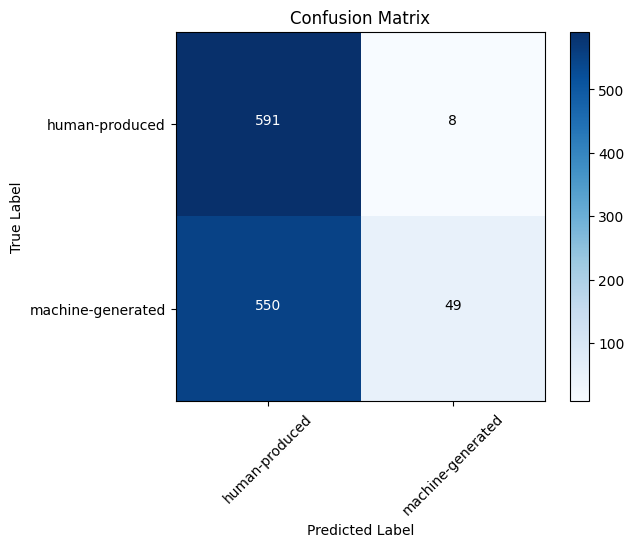

In [19]:
import numpy as np
true_labels = []
for i in range(0, 599):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')


# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



##coher

In [22]:
import json

# Replace 'your_file.jsonl' with the path to your JSONL file
file_path = '/content/drive/MyDrive/Marcus_Project/wiki/wikipedia_cohere_test.jsonl'

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse each line as a JSON object
        json_obj = json.loads(line.strip())

        # Print the keys of the JSON object
        print(json_obj.keys())
        break

# Open the JSONL file
with open(file_path, 'r') as file:
    # Initialize a counter
    line_count = 0
    # Iterate over each line in the file
    for line in file:
        # Increment the counter for each line
        line_count += 1

# Print the total number of lines
print("Total number of lines:", line_count)


dict_keys(['prompt', 'human_text', 'machine_text', 'model', 'source', 'source_id'])
Total number of lines: 468


In [23]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/wiki/wikipedia_cohere_test.jsonl"

# Function to truncate or split machine_text to fit within max_length
def truncate_or_split(text, max_length=512):
    if len(text) <= max_length:
        return [text]
    else:
        # Truncate the text to max_length
        return [text[:max_length]]

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    line_count = 0
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = data['machine_text']

            # Truncate or split machine_text to fit within max_length
            machine_text_segments = truncate_or_split(machine_text)

            for segment in machine_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            human_text = data['human_text']

            # Truncate or split machine_text to fit within max_length
            human_text_segments = truncate_or_split(human_text)

            for segment in human_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            line_count += 1
            print(count, end=" ")  # Print count without newline

            #print(predictions)
            count += 1
    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

The accuracy is 0.5085470085470085
The precision is 0.6021834061135372
The recall is 0.5085470085470085


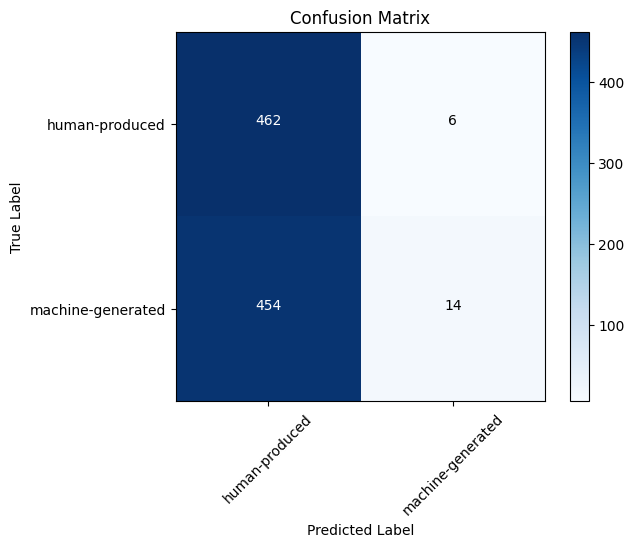

In [24]:
import numpy as np
true_labels = []
for i in range(0, 468):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')


# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



##Bloomz

In [25]:
import json

# Replace 'your_file.jsonl' with the path to your JSONL file
file_path = '/content/drive/MyDrive/Marcus_Project/wiki/wikipedia_bloomz_test.jsonl'

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse each line as a JSON object
        json_obj = json.loads(line.strip())

        # Print the keys of the JSON object
        print(json_obj.keys())
        break

# Open the JSONL file
with open(file_path, 'r') as file:
    # Initialize a counter
    line_count = 0
    # Iterate over each line in the file
    for line in file:
        # Increment the counter for each line
        line_count += 1

# Print the total number of lines
print("Total number of lines:", line_count)


dict_keys(['id', 'url', 'title', 'text', 'machine_abstract', 'machine_text', 'prompt', 'score', 'probas', 'logits', 'model', 'source'])
Total number of lines: 600


In [26]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/wiki/wikipedia_bloomz_test.jsonl"

# Function to truncate or split machine_text to fit within max_length
def truncate_or_split(text, max_length=512):
    if len(text) <= max_length:
        return [text]
    else:
        # Truncate the text to max_length
        return [text[:max_length]]

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    line_count = 0
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = data['machine_text']

            # Truncate or split machine_text to fit within max_length
            machine_text_segments = truncate_or_split(machine_text)

            for segment in machine_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            human_text = data['text']

            # Truncate or split machine_text to fit within max_length
            human_text_segments = truncate_or_split(human_text)

            for segment in human_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            line_count += 1
            print(count, end=" ")  # Print count without newline

            #print(predictions)
            count += 1
    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

The accuracy is 0.5033333333333333
The precision is 0.5271763746716188
The recall is 0.5033333333333333


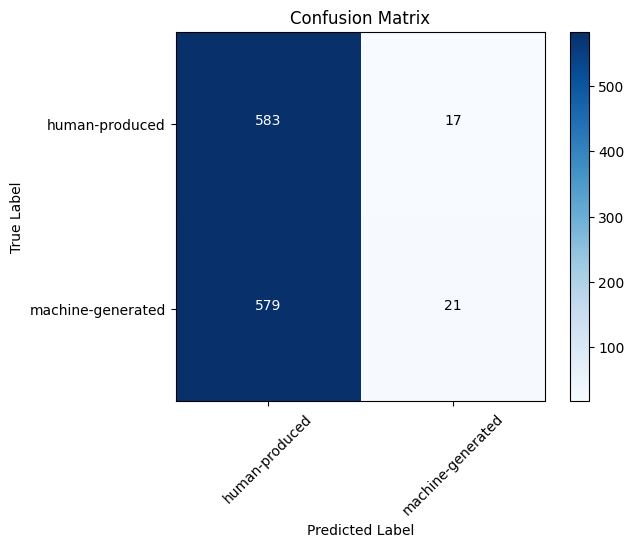

In [27]:
import numpy as np
true_labels = []
for i in range(0, 600):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')


# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



##Davinci

In [28]:
import json

# Replace 'your_file.jsonl' with the path to your JSONL file
file_path = '/content/drive/MyDrive/Marcus_Project/wiki/wikipedia_davinci_test.jsonl'

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse each line as a JSON object
        json_obj = json.loads(line.strip())

        # Print the keys of the JSON object
        print(json_obj.keys())
        break

# Open the JSONL file
with open(file_path, 'r') as file:
    # Initialize a counter
    line_count = 0
    # Iterate over each line in the file
    for line in file:
        # Increment the counter for each line
        line_count += 1

# Print the total number of lines
print("Total number of lines:", line_count)


dict_keys(['prompt', 'human_text', 'machine_text', 'model', 'source', 'source_id'])
Total number of lines: 600


In [29]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/wiki/wikipedia_davinci_test.jsonl"

# Function to truncate or split machine_text to fit within max_length
def truncate_or_split(text, max_length=512):
    if len(text) <= max_length:
        return [text]
    else:
        # Truncate the text to max_length
        return [text[:max_length]]

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    line_count = 0
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = data['machine_text']

            # Truncate or split machine_text to fit within max_length
            machine_text_segments = truncate_or_split(machine_text)

            for segment in machine_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            human_text = data['human_text']

            # Truncate or split machine_text to fit within max_length
            human_text_segments = truncate_or_split(human_text)

            for segment in human_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            line_count += 1
            print(count, end=" ")  # Print count without newline

            #print(predictions)
            count += 1
    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

The accuracy is 0.5208333333333334
The precision is 0.6742929515930376
The recall is 0.5208333333333334


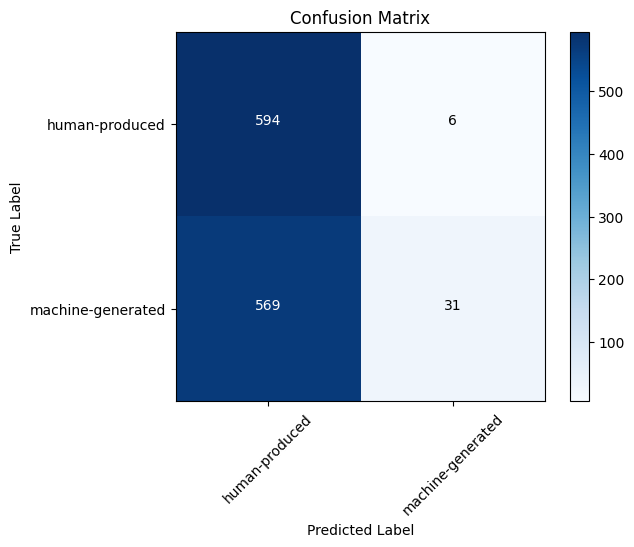

In [30]:
import numpy as np
true_labels = []
for i in range(0, 600):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')

# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()



##ML Dataset

In [31]:
import json

# Replace 'your_file.jsonl' with the path to your JSONL file
file_path = '/content/drive/MyDrive/Marcus_Project/ml_dataset/arxiv_papers_with_MT.jsonl'

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Parse each line as a JSON object
        json_obj = json.loads(line.strip())

        # Print the keys of the JSON object
        print(json_obj.keys())
        break

# Open the JSONL file
with open(file_path, 'r') as file:
    # Initialize a counter
    line_count = 0
    # Iterate over each line in the file
    for line in file:
        # Increment the counter for each line
        line_count += 1

# Print the total number of lines
print("Total number of lines:", line_count)


dict_keys(['arxiv_id', 'archive_size', 'title', 'sections', 'tables', 'Prompt', 'Abstract', 'machine_text'])
Total number of lines: 3000


In [33]:
# Path to the JSONL file
jsonl_path = "/content/drive/MyDrive/Marcus_Project/ml_dataset/arxiv_papers_with_MT.jsonl"

# Function to truncate or split machine_text to fit within max_length
def truncate_or_split(text, max_length=512):
    if len(text) <= max_length:
        return [text]
    else:
        # Truncate the text to max_length
        return [text[:max_length]]

# Function to read JSONL file and classify texts
def classify_texts(jsonl_path):
    predictions = []
    line_count = 0
    count = 0
    with open(jsonl_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            machine_text = data['machine_text']

            # Truncate or split machine_text to fit within max_length
            machine_text_segments = truncate_or_split(machine_text)

            for segment in machine_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            human_text = data['Abstract']

            # Truncate or split machine_text to fit within max_length
            human_text_segments = truncate_or_split(human_text)

            for segment in human_text_segments:
                # Classify each segment of machine_text
                result = classifier(segment)
                # Append the most confident prediction
                predictions.append(result[0]['label'])

            line_count += 1
            print(count, end=" ")  # Print count without newline

            #print(predictions)
            count += 1
    return predictions

# Get predictions for the entries in the JSONL file
results = classify_texts(jsonl_path)
print(results)



0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

The accuracy is 0.7066666666666667
The precision is 0.7665552293836727
The recall is 0.7066666666666667


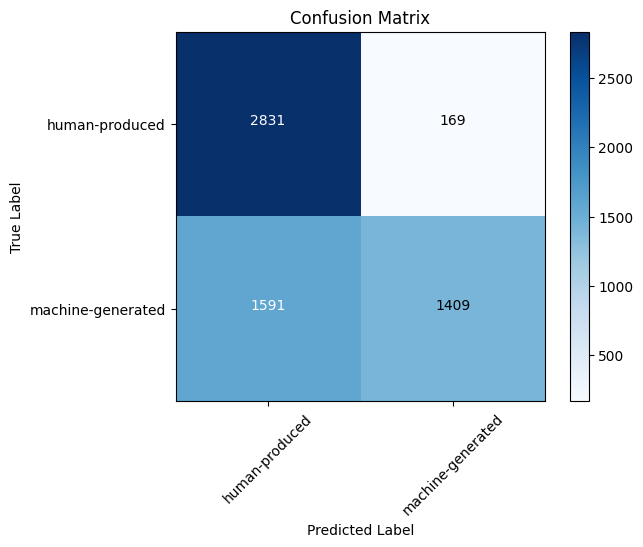

In [34]:
import numpy as np
true_labels = []
for i in range(0, 3000):
    true_labels.append('machine-generated')
    true_labels.append('human-produced')

# Count occurrences of each label
human_count = results.count('human-produced')
machine_count = results.count('machine-generated')

# Calculate total number of predictions
total_predictions = len(results)


import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Encode labels
encoder = LabelEncoder()
# Fit encoder with all possible labels
all_labels = ['human-produced', 'machine-generated']
encoder.fit(all_labels)
true_labels_encoded = encoder.fit_transform(true_labels)
predictions_encoded = encoder.transform(results)


# Compute confusion matrix
cm = confusion_matrix(true_labels_encoded, predictions_encoded)

# Compute accuracy
accuracy = accuracy_score(true_labels_encoded, predictions_encoded)
print('The accuracy is', accuracy)
# Compute precision
precision = precision_score(true_labels_encoded, predictions_encoded, average='macro')
print('The precision is', precision)
# Compute recall
recall = recall_score(true_labels_encoded, predictions_encoded, average='macro')
print('The recall is', recall)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = encoder.classes_
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.show()

